# RECOMMENDATION ENGINE FOR GREGS BOOKS STORE
Online Book RFM Data

## Initializations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings("ignore")
df = pd.read_excel('Final Assignment - Week 9.xlsx')

In [2]:
df.head(5)

,id,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,...,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
0,914,NaN,194,7,318.894775,1703,1,0,1,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,NaN,3,14,368.052246,2364,1,0,2,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,NaN,1489,15,423.298340,2371,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,NaN,155,4,71.217041,1290,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,NaN,194,6,442.638184,2188,0,0,1,0,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


### Let's identify the columns that have missing data.
1) Firstly create a function that accepts a DF.
2) create a DF missing_df and get the column names from the input df as the Row Values for the DF.
3) Create a column Missing % and calculate the null rows for each column and normalize it to a percent.

In [3]:
def missing_perc(df):
    """
    Function to calculate missing data % by column
    given a data frame

    """
    missing_df = pd.DataFrame()
    missing_df['Col Name'] = list(df.columns)
    missing_df['Missing %'] = [round(i/df.shape[0] * 100,2) for i in df.isnull().sum()]
    missing_df.sort_values(by=['Missing %'], ascending=False,inplace=True)
    missing_df['Missing %'] = missing_df['Missing %'].astype('str') + '%'
    pd.set_option('display.max_rows', None)
    return missing_df
# Calculate missing data % per column
missing_perc(df)

,Col Name,Missing %
1,logtarg,75.35%
42,Mpsychology9,0.0%
48,Mconthist20,0.0%
47,Mhistory19,0.0%
46,Mfacsimile17,0.0%
45,Mmusic14,0.0%
44,Mart12,0.0%
43,Mlinguistics10,0.0%
0,id,0.0%
49,Meconomy21,0.0%


### Delete columns with missing data

In [4]:
df = df.drop(['logtarg'],axis=1,inplace=False)

### Rename the columns to make more sense

In [5]:
col = list(df.columns)
freq_col_list = []
monet_col_list = []
def relabel_data(col):
    for i in range(len(col)):
        if col[i] == 'r':
            col[i] = 'recency'
        elif col[i] == 'f':
            col[i] = 'overall frequency'
            freq_col_list.append(col[i])
        elif  col[i] == 'm':
            col[i] = 'overall monetary'
            monet_col_list.append(col[i])
        elif  col[i] == 'tof':
            col[i] = 'time on file in days'
        elif  col[i][0] == 'F':
            col[i] = 'frequency: ' + col[i] [1:]
            col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])
            freq_col_list.append(col[i])
        elif  col[i][0] == 'M':
            col[i] = 'monetary: ' + col[i] [1:]
            col[i] = re.sub(r'\d+', ' books', col[i]) if 'nonbooks' not in col[i] else re.sub(r'\d+', '', col[i])
            monet_col_list.append(col[i])

    return col

df.columns = relabel_data(col)

In [6]:
df.head()

,id,recency,overall frequency,overall monetary,time on file in days,frequency: fiction books,frequency: classics books,frequency: cartoons books,frequency: legends books,frequency: philosophy books,...,monetary: health books,monetary: cooking books,monetary: learning books,monetary: GamesRiddles books,monetary: sports books,monetary: hobby books,monetary: nature books,monetary: encyclopaedia books,monetary: videos books,monetary: nonbooks
0,914,194,7,318.894775,1703,1,0,1,0,0,...,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1,957,3,14,368.052246,2364,1,0,2,0,0,...,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
2,1406,1489,15,423.298340,2371,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,1414,155,4,71.217041,1290,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
4,1546,194,6,442.638184,2188,0,0,1,0,3,...,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


## Visualizations

### Histograms
Let's Visualize the Recency, Overall Frequency, Overall Monetary, The Time on File (in Days) (ToF), and the Frequency and Monetary values for two random categories.

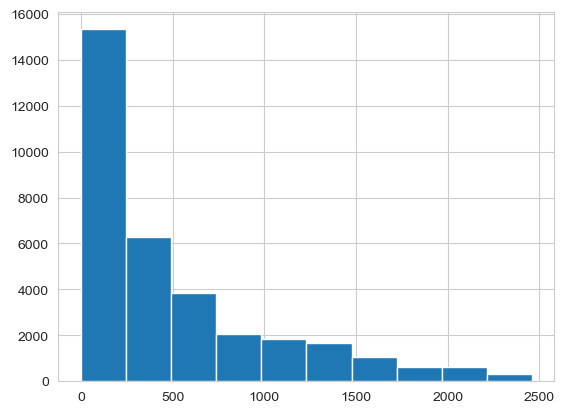

In [16]:
counts, bins, bars = plt.hist(df["recency"],bins=10)

In [13]:
counts

array([10176.,  6353.,  4115.,  2764.,  1969.,  1454.,  1198.,   918.,
         740.,   586.])

In [14]:
bins

array([  0.        ,  49.99211426,  99.98422852, 149.97634277,
       199.96845703, 249.96057129, 299.95268555, 349.94479981,
       399.93691406, 449.92902832, 499.92114258])

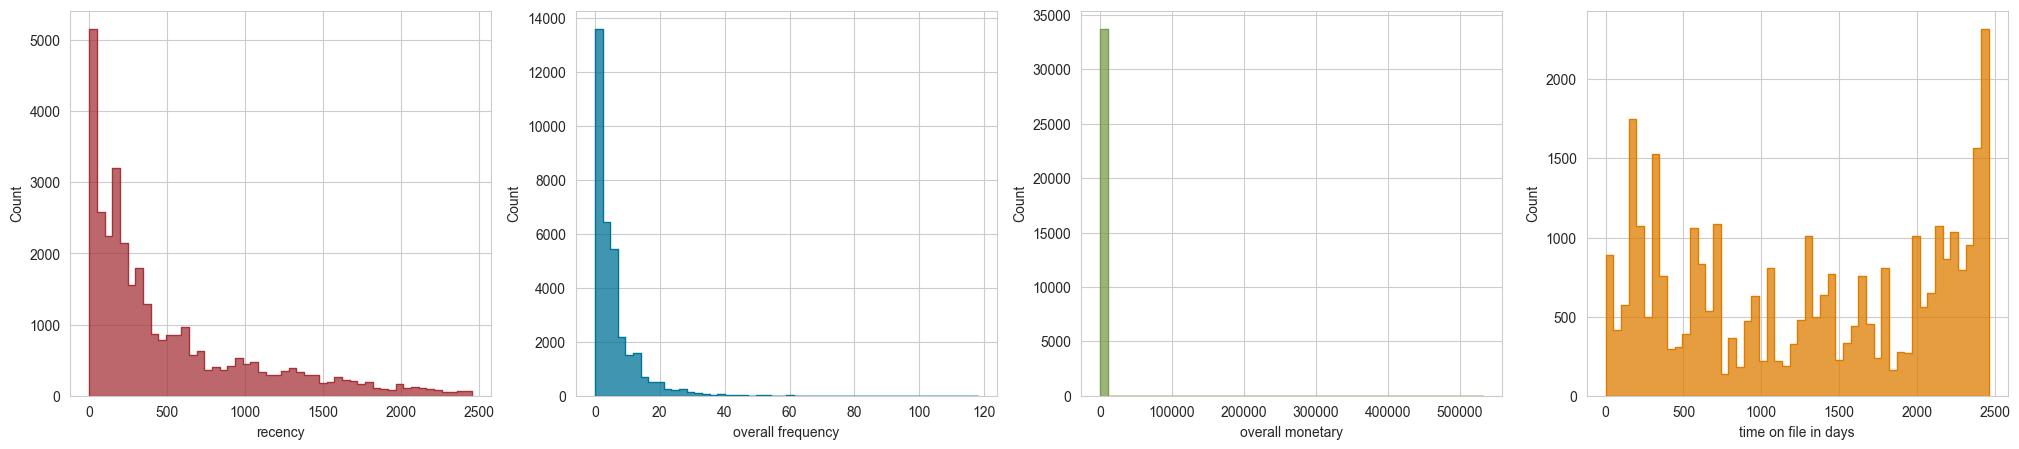

In [7]:
fig_desc, ax = plt.subplots(1, 4, figsize=(25,5))

#row 1
recency = sns.histplot(df["recency"], bins=50,ax=ax[0],legend=False,element="step",color="#A4343A")
overall_Frequency = sns.histplot(df["overall frequency"], bins=50,ax=ax[1],legend=False,element="step",color="#007396")
#row 2
overall_monetary = sns.histplot(df["overall monetary"], bins=50,ax=ax[2],legend=False,element="step",color="#789D4A")
tof = sns.histplot(df["time on file in days"], bins=50,ax=ax[3],legend=False,element="step",color="#DE7C00")


### Value Descriptions
Let's Describe all the variables to get an idea about them.

#### Recency

In [8]:
df["recency"].describe()

count    33713.000000
mean       508.427254
std        542.440039
min          0.000000
25%        117.000000
50%        293.000000
75%        712.000000
max       2460.000000
Name: recency, dtype: float64

#### Frequency

In [9]:
df[freq_col_list].describe()

,overall frequency,frequency: fiction books,frequency: classics books,frequency: cartoons books,frequency: legends books,frequency: philosophy books,frequency: religion books,frequency: psychology books,frequency: linguistics books,frequency: art books,...,frequency: health books,frequency: cooking books,frequency: learning books,frequency: GamesRiddles books,frequency: sports books,frequency: hobby books,frequency: nature books,frequency: encyclopaedia books,frequency: videos books,frequency: nonbooks
count,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,...,33713.000000,33713.000000,33713.00000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,5.820603,0.590900,0.228102,0.356480,0.104767,0.290659,0.980957,0.046570,0.203215,0.608549,...,2.109898,0.425444,0.61718,0.034497,0.001809,0.637736,0.317237,0.480912,0.407617,0.463174
std,7.008049,1.762201,0.865510,1.105653,0.527764,1.088606,3.112212,0.262156,0.641489,1.884077,...,5.340294,1.695695,1.64184,0.207741,0.043191,1.723662,1.049727,1.253211,1.306615,1.447000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,2.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,118.000000,109.000000,29.000000,49.000000,22.000000,35.000000,134.000000,8.000000,21.000000,113.000000,...,210.000000,78.000000,59.00000,6.000000,2.000000,56.000000,53.000000,50.000000,55.000000,110.000000


In [36]:
df[[x for x in freq_col_list if x !="overall frequency"]].sum().sort_values()

frequency: sports books              61
frequency: politics books          1010
frequency: GamesRiddles books      1163
frequency: psychology books        1570
frequency: facsimile books         1718
frequency: maps books              2528
frequency: legends books           3532
frequency: compsci books           5086
frequency: railroads books         6305
frequency: linguistics books       6851
frequency: economy books           7025
frequency: classics books          7690
frequency: philosophy books        9799
frequency: nature books           10695
frequency: cartoons books         12018
frequency: videos books           13742
frequency: science books          13849
frequency: cooking books          14343
frequency: nonbooks               15615
frequency: encyclopaedia books    16213
frequency: fiction books          19921
frequency: art books              20516
frequency: learning books         20807
frequency: hobby books            21500
frequency: religion books         33071


In [37]:
df[[x for x in monet_col_list if x !="overall monetary"]].sum().sort_values()

monetary: sports books           6.972117e+02
monetary: GamesRiddles books     1.029008e+04
monetary: politics books         1.062371e+04
monetary: psychology books       2.415770e+04
monetary: legends books          4.212650e+04
monetary: compsci books          4.478586e+04
monetary: maps books             4.910964e+04
monetary: nonbooks               6.071620e+04
monetary: economy books          6.796181e+04
monetary: railroads books        7.090425e+04
monetary: linguistics books      7.464876e+04
monetary: cartoons books         8.406203e+04
monetary: facsimile books        1.245647e+05
monetary: nature books           1.257035e+05
monetary: philosophy books       1.283409e+05
monetary: classics books         1.317905e+05
monetary: cooking books          1.423845e+05
monetary: science books          1.638965e+05
monetary: fiction books          1.750229e+05
monetary: videos books           2.029668e+05
monetary: hobby books            2.287615e+05
monetary: encyclopaedia books    2

1) We can see from the min,25 and 50 % values that for most of the categories the data is extremely right skewed. This broadly matches the overall frequency as well.
2) Only the Time on File data is not right skewed.

#### Monetary

In [10]:
df[monet_col_list].describe()

,overall monetary,monetary: fiction books,monetary: classics books,monetary: cartoons books,monetary: legends books,monetary: philosophy books,monetary: religion books,monetary: psychology books,monetary: linguistics books,monetary: art books,...,monetary: health books,monetary: cooking books,monetary: learning books,monetary: GamesRiddles books,monetary: sports books,monetary: hobby books,monetary: nature books,monetary: encyclopaedia books,monetary: videos books,monetary: nonbooks
count,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,...,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,251.924325,5.191555,3.909188,2.493460,1.249562,3.806866,16.368536,0.716569,2.214243,10.756127,...,29.095301,4.223431,21.147507,0.305226,0.020681,6.785558,3.728635,8.402428,6.020431,1.800973
std,3929.929826,17.670335,28.864567,8.444797,8.180311,18.350047,797.146228,6.795593,9.197459,38.383837,...,2087.221131,19.975164,2898.452008,1.991675,0.501499,21.197488,15.007592,46.021881,19.643978,21.383867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.899994,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,102.629944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,247.297485,2.556458,0.000000,0.000000,0.000000,0.000000,7.949997,0.000000,0.000000,5.087353,...,18.899994,0.000000,2.500000,0.000000,0.000000,5.112919,0.000000,0.000000,0.000000,0.000000
max,532892.000000,1085.540039,1727.143555,344.655762,454.507324,654.948730,146154.750000,299.000000,810.397461,2632.572266,...,383154.500000,820.563477,532182.000000,78.724670,21.448685,771.610840,735.354980,1999.150391,794.137695,2412.960938


3) The monetary data seems to follow the same trend.

### Value Representations
Let's visualize the various variables by frequency and monetary

In [11]:
import math
import random
def displays(dataframe,cols):
    rows = math.trunc(len(cols)/5)+1
    freq_value = plt.figure(constrained_layout=True, figsize=(30,30))
    freq_value.suptitle('Figure title')
    # create 3x1 subfigs
    red_color_list = ["#A4343A","#B46A55","#643335"]
    blue_color_list = ["#007396","#3EB1C8","#002A3A"]
    golden_color_list = ["#789D4A","#A9C47F","#13301C"]
    green_color_list = ["#DE7C00","#ECA154","#A9431E"]
    violet_color_list = ["#59315F","#86647A","#41273B"]
    subfigs = freq_value.subfigures(nrows=rows, ncols=1)
    for row, subfig in enumerate(subfigs):
        # create 1x4 subplots per subfig
        axs = subfig.subplots(nrows=1, ncols=5)
        subcols = []
        subcols.append(cols[(row*5)+0])
        hist1 = sns.histplot(df[subcols[0]],bins=50,ax=axs[0],color=random.choice(red_color_list))
        if (row * 5)+1<(len(cols)-1):
            subcols.append(cols[(row*5)+1])
            hist2 = sns.histplot(df[subcols[1]],bins=50,ax=axs[1],color=random.choice(blue_color_list))
        else:
            axs[1].set_axis_off()
        if (row * 5)+2<(len(cols)-1):
            subcols.append(cols[(row*5)+2])
            hist3 = sns.histplot(df[subcols[2]],bins=50,ax=axs[2],color=random.choice(golden_color_list))
        else:
            axs[2].set_axis_off()
        if ((row * 5) + 3)<(len(cols)-1):
            subcols.append(cols[(row*5)+3])
            hist4 = sns.histplot(df[subcols[3]],bins=50,ax=axs[3],color=random.choice(green_color_list))
        else:
            axs[3].set_axis_off()
        if ((row * 5) + 4)<(len(cols)-1):
            subcols.append(cols[(row*5)+4])
            hist5 = sns.histplot(df[subcols[4]],bins=50,ax=axs[4],color=random.choice(violet_color_list))
        else:
            axs[4].set_axis_off()

### Frequency

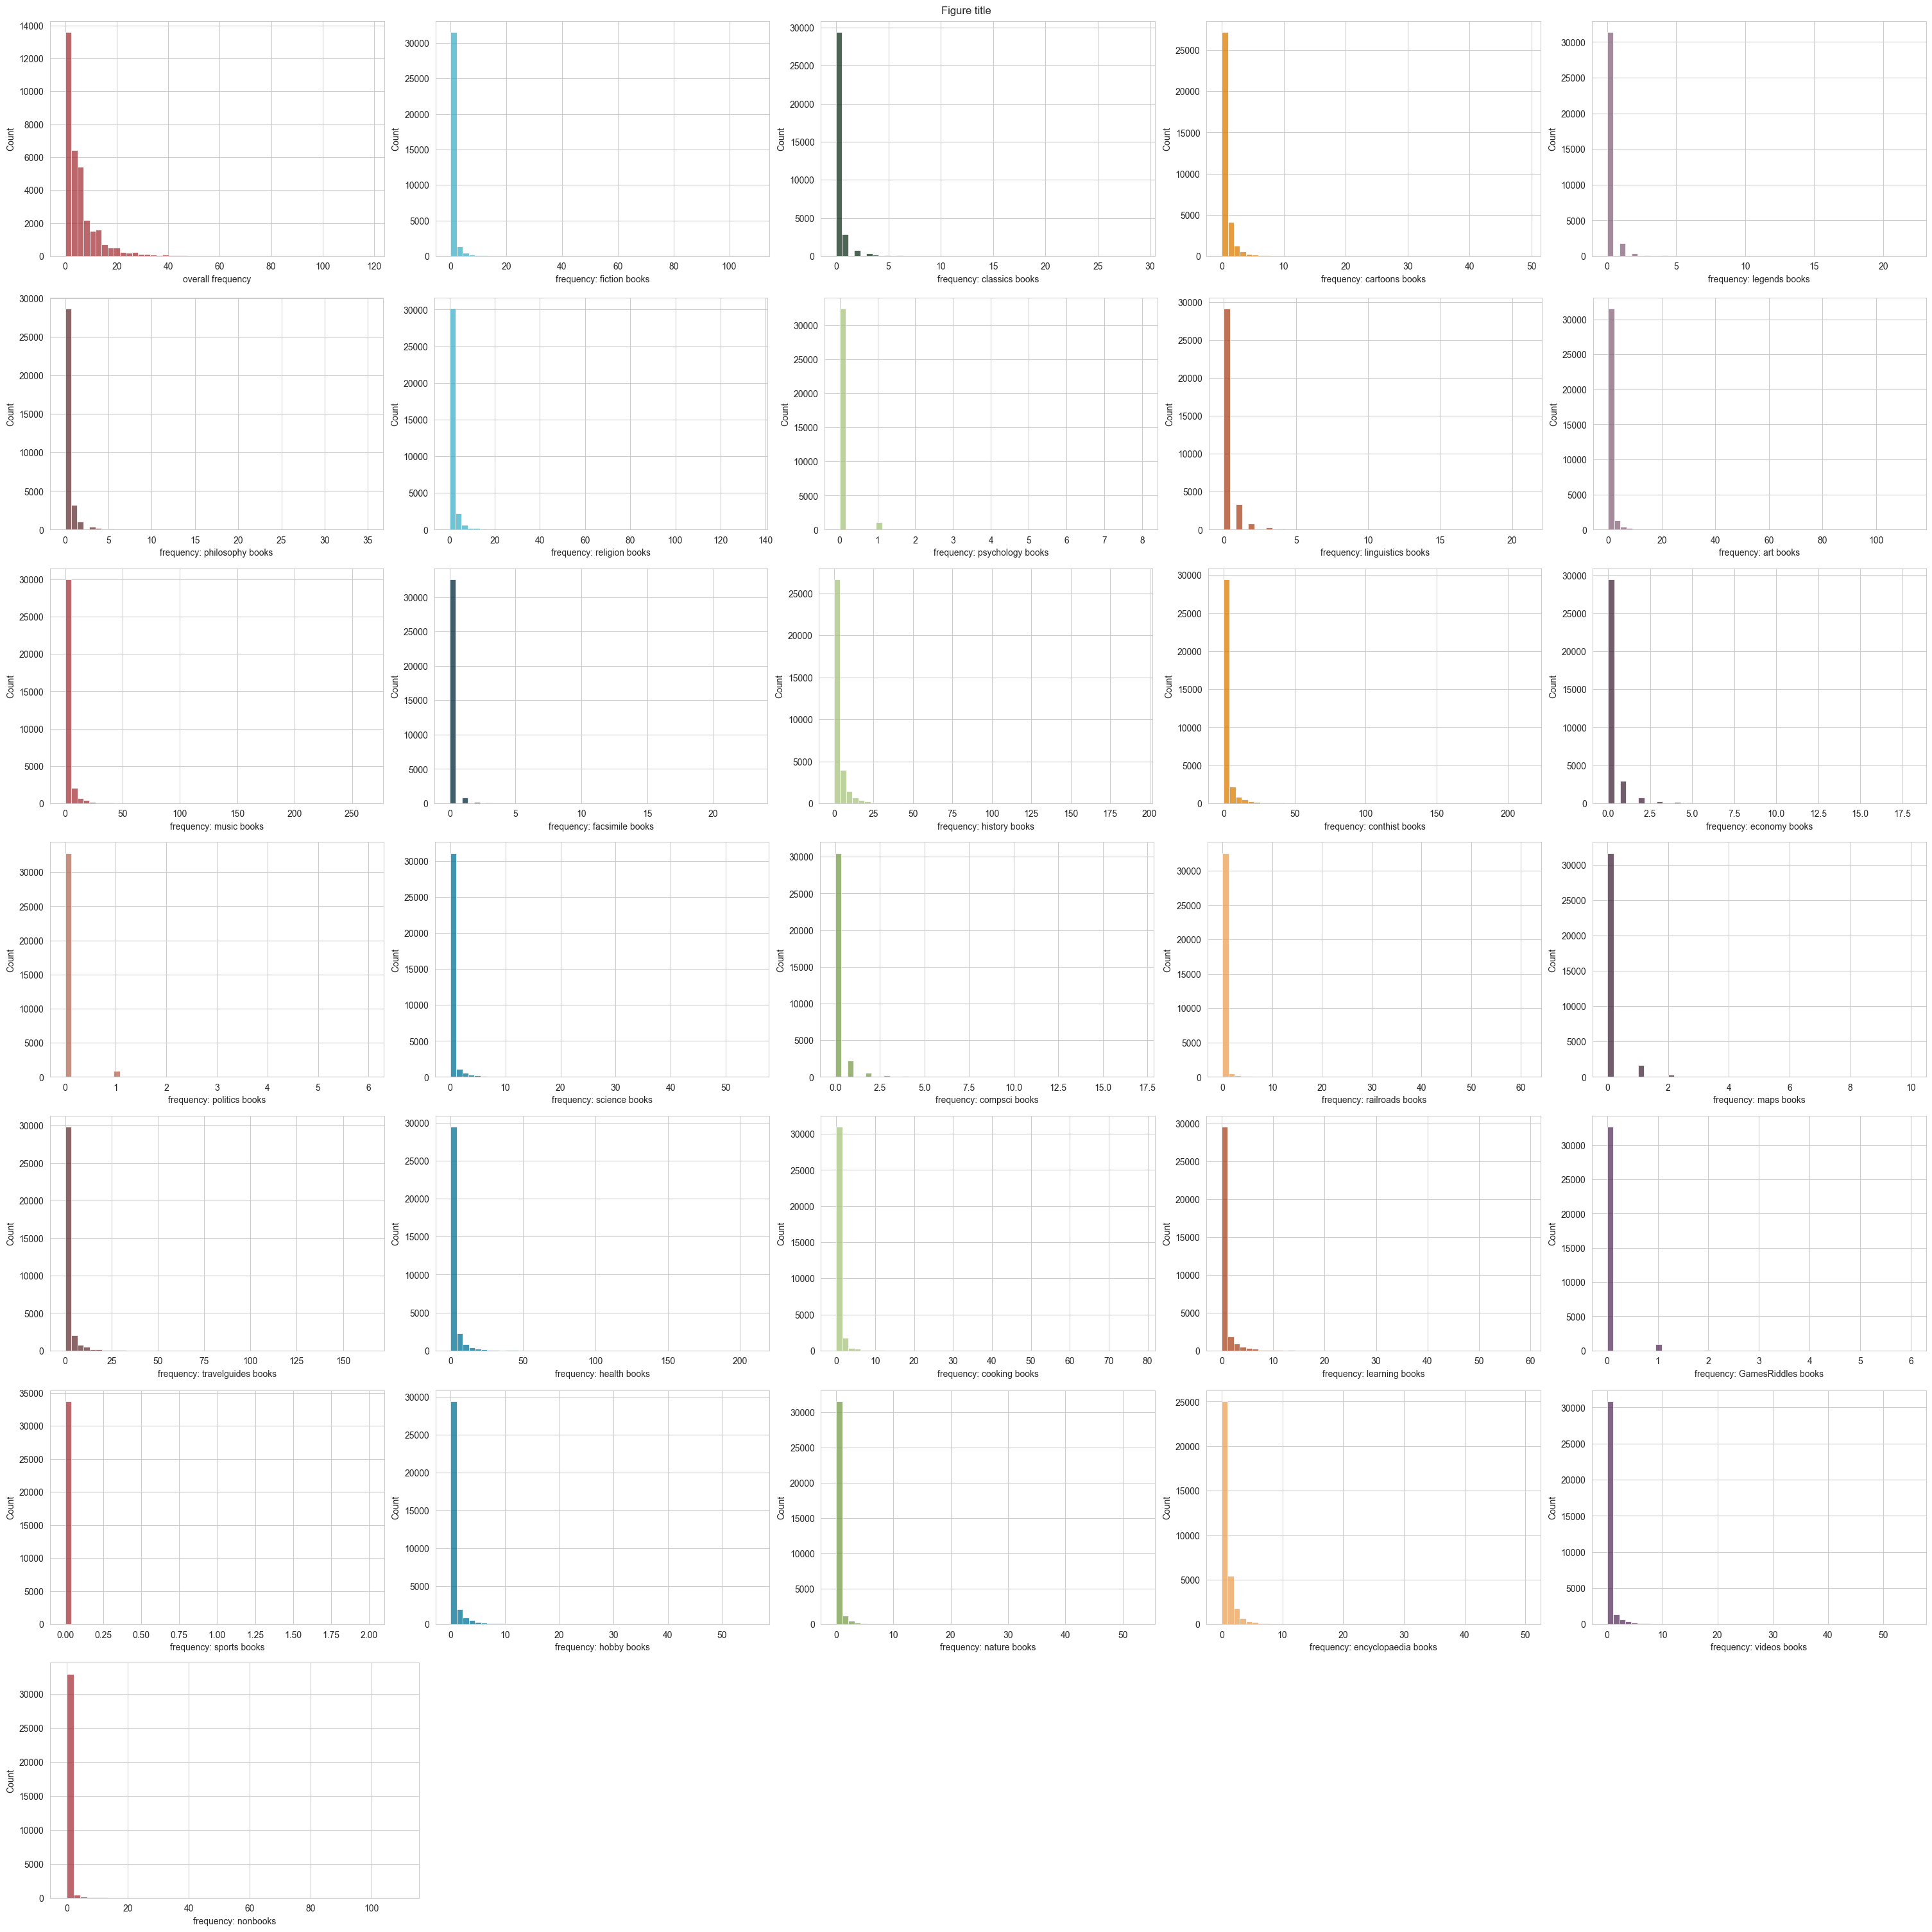

In [12]:
displays(df,freq_col_list)

### Monetary

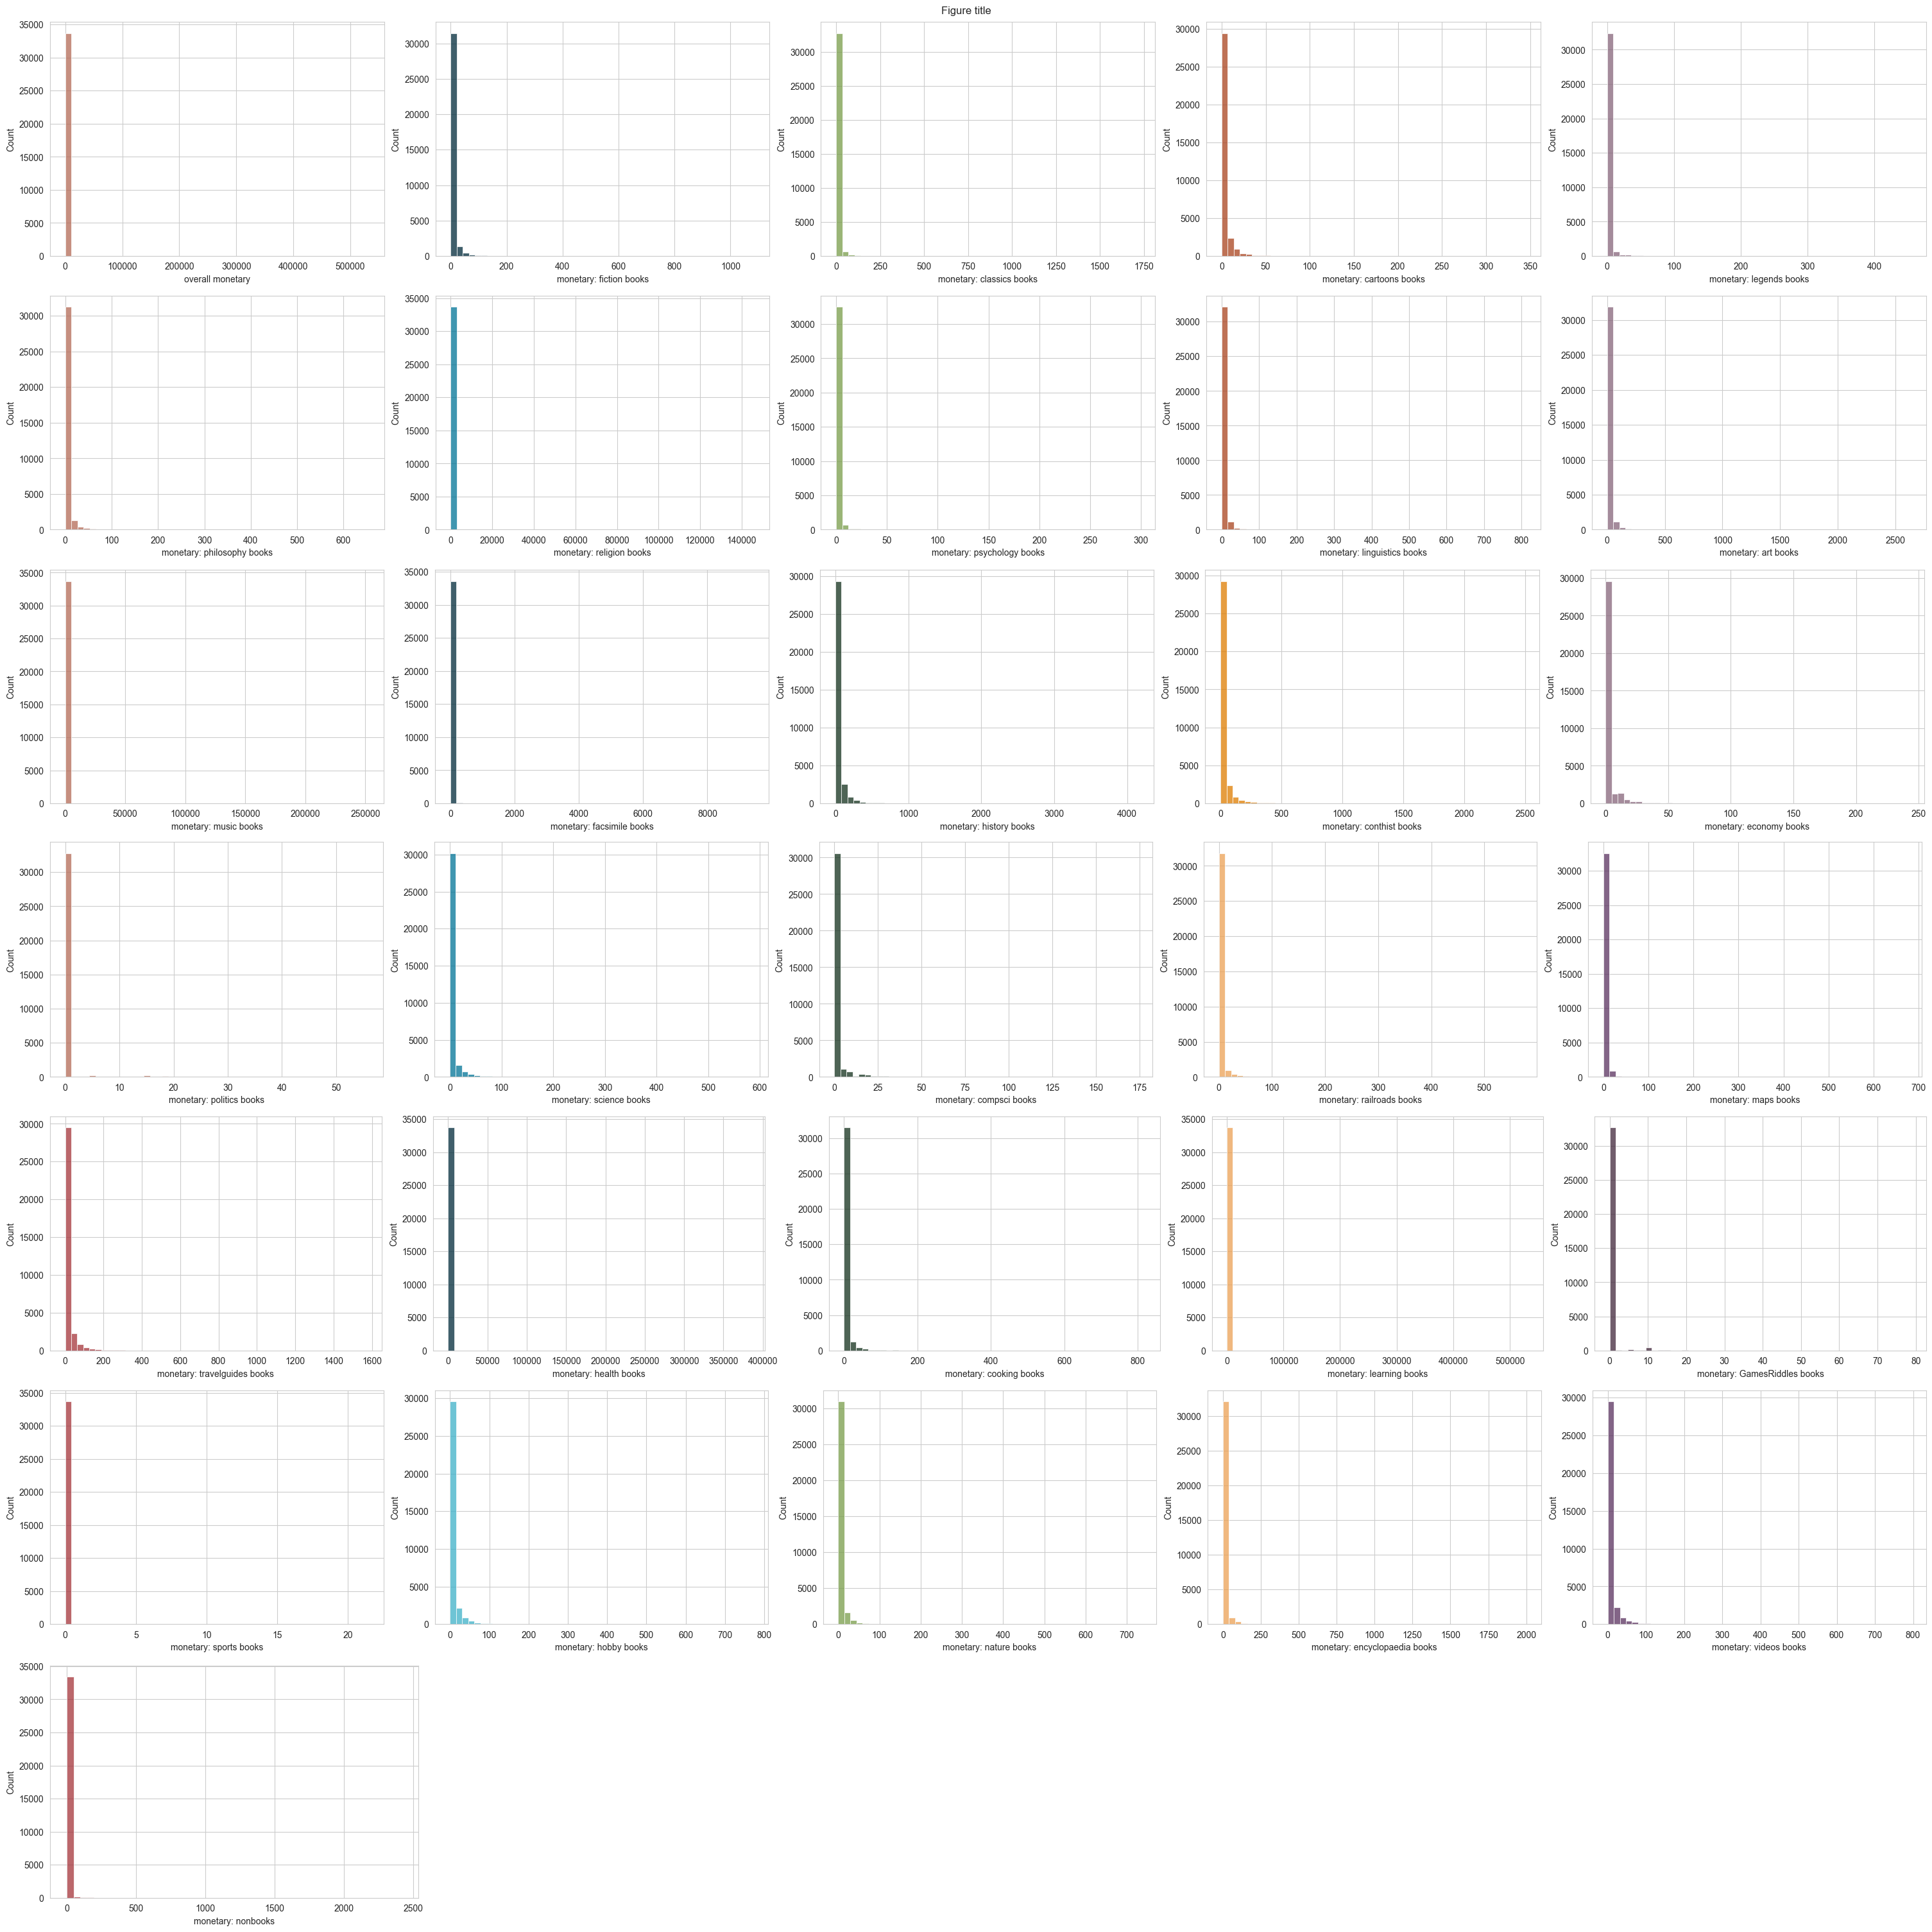

In [13]:
displays(df,monet_col_list)

### Distributions
Let's visualize the distributions of the overall features

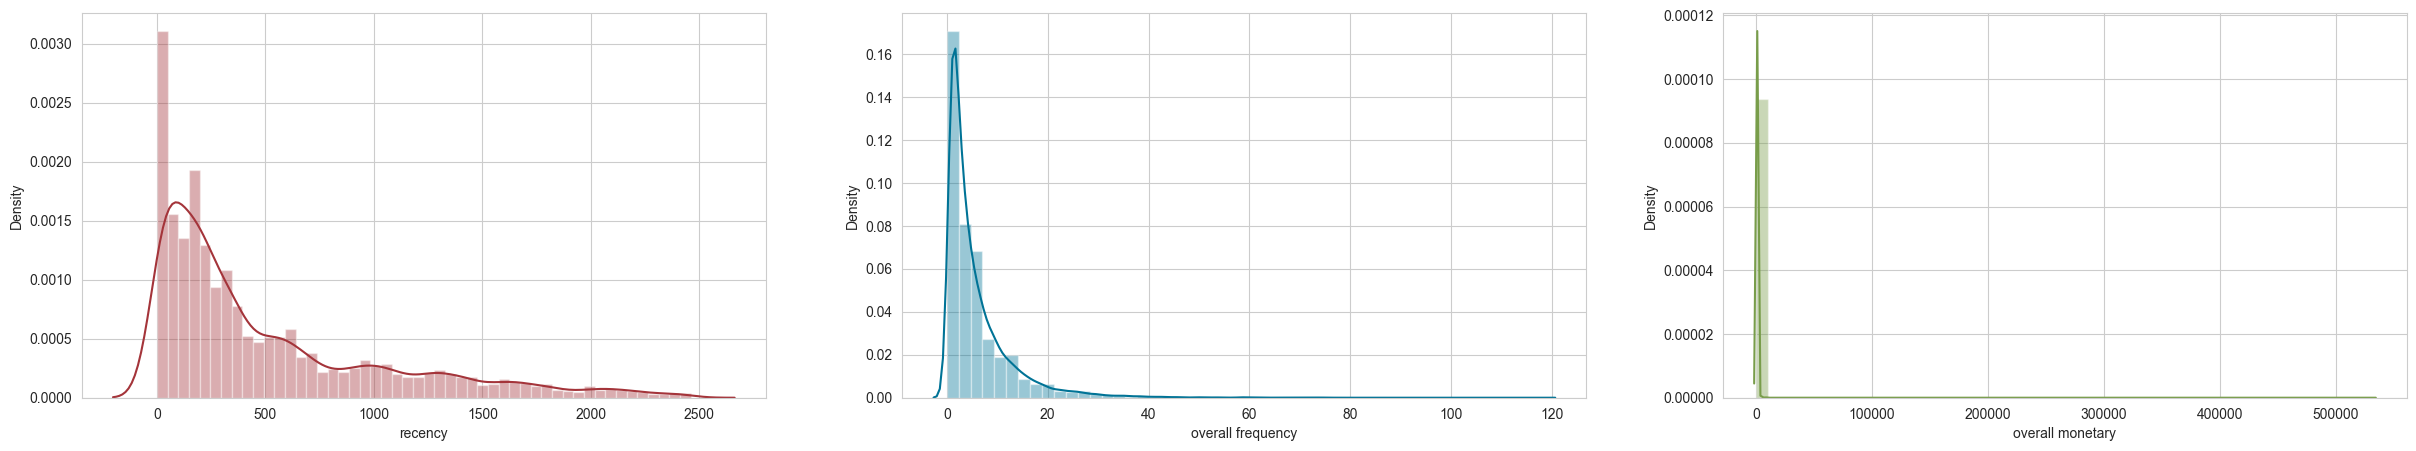

In [14]:
fig_distr, ax = plt.subplots(1, 3, figsize=(30,5))

recency_distr = sns.distplot(df["recency"],ax=ax[0],color="#A4343A")
oFrequency_distr = sns.distplot(df["overall frequency"],ax=ax[1],color="#007396")
oMonetary_distr = sns.distplot(df["overall monetary"],ax=ax[2],color="#789D4A")

## Model Creation

### Creating an RFM Model
I will be implementing an RFM model, which is an unsupervised learning approach. In an RFM Model we will be ranking customers based on their spending habits, which will then be used to group them into specific categories so that we can target them specifically.

Let's create the labels for the recency. Most customers can be put into 3 buckets, 1: Very Recent, 2: Average, but should be nudged 3: Requires Activation

In [15]:
r_label = range(1,4)
r = pd.qcut(df['recency'], q=[0,.1,.5,1], labels=r_label,retbins=True)
r_group = r[0]
r_bins = r[1]
df_process = df.assign(R = r_group.values)

Let's create the labels for the Frequency. Most customers can be put into 4 buckets, 1: New Customer, 2: Average Customer, 3: Potentially Loyal, 4: Loyal Customer

In [16]:
f_labels = range(1, 5)
f = pd.qcut(df['overall frequency'], q=[0,.1,0.5,.9,1], labels=f_labels,retbins=True)
f_group = f[0]
f_bins = f[1]
df_process = df_process.assign(F = f_group.values)

Let's create the Labels for Monetary Value. Monetary has been split into only 3 categories. While it is usefull to identify big spenders, the average spender does not need more than 1 category to represent it. The vast amount of customers can be split into .2% to .8%, while big spenders are greater than.8%

In [17]:
m_labels = range(1, 4)
m = pd.qcut(df['overall monetary'], q=[0,.2,.8,1], labels=m_labels,retbins=True)
m_group = m[0]
m_bins = m[1]
df_process = df_process.assign(M = m_group.values)

Let's create RFM Segments by using the RFM Quartile values

In [18]:
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
df_process['RFM_Segment_Concat'] = df_process.apply(join_rfm, axis=1)
rfm = df_process[['recency','overall frequency','overall monetary',
                 'time on file in days','R','F','M','RFM_Segment_Concat']]
rfm.head()

,recency,overall frequency,overall monetary,time on file in days,R,F,M,RFM_Segment_Concat
0,194,7,318.894775,1703,2,3,3,233
1,3,14,368.052246,2364,1,3,3,133
2,1489,15,423.298340,2371,3,4,3,343
3,155,4,71.217041,1290,2,3,2,232
4,194,6,442.638184,2188,2,3,3,233


Count the number of unique segments

In [19]:
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
rfm_count_unique.sum()

32

While there are a huge number of segments, subsampling those segments could result in some lost information, thus it makes more sense to give the rank a name and create a segment name based on the ranks.
We can create special labels for specific groups

In [20]:
def rfm_labels(dfs):
    r_labels = ["Recent","Nudge","Old"]
    f_labels = ["low","Average","Promising","Loyal"]
    m_labels = ["Cheap","Moderate","Whale"]
    label_rfm = r_labels[dfs["R"]-1] + ", " + f_labels[dfs["F"]-1] + ", " + m_labels[dfs["M"]-1]
# Special labels
    if dfs["R"] in [1] and dfs["F"] in [4] and dfs["M"] in [3]: label_rfm = "Star Customer"
    elif dfs["R"] in [3] and dfs["F"] in [1,2,3,4] and dfs["M"] in [3]: label_rfm = "Needs Urgent Attention"
    elif dfs["R"] in [2] and dfs["F"] in [3,4] and dfs["M"] in [3]: label_rfm = "At Risk"
    elif dfs["R"] in [1] and dfs["F"] in [3,4] and dfs["M"] in [2,3]: label_rfm = "Potentially Big"
    elif dfs["R"] in [1] and dfs["F"] in [2,3,4] and dfs["M"] in [2,3]: label_rfm = "Potentially loyal"
    elif dfs["R"] in [1,2] and dfs["F"] in [1,2] and dfs["M"] in [1]: label_rfm = "New Customer"
    elif dfs["R"] in [1,2] and dfs["F"] in [1,2,3,4] and dfs["M"] in [1,2]: label_rfm = "Promising"
    elif dfs["R"] in [2] and dfs["F"] in [1,2,3] and dfs["M"] in [2,3]: label_rfm = "Needs Big Nudge"
    elif dfs["R"] in [3] and dfs["F"] in [1,2] and dfs["M"] in [1]: label_rfm = "Not Worth It"
    elif dfs["R"] in [3] and dfs["F"] in [1,2,3,4] and dfs["M"] in [2]: label_rfm = "Requires Activation"
    return label_rfm
rfm['RFM_Label'] = rfm.apply(rfm_labels, axis=1)
rfm.head(5)

,recency,overall frequency,overall monetary,time on file in days,R,F,M,RFM_Segment_Concat,RFM_Label
0,194,7,318.894775,1703,2,3,3,233,At Risk
1,3,14,368.052246,2364,1,3,3,133,Potentially Big
2,1489,15,423.298340,2371,3,4,3,343,Needs Urgent Attention
3,155,4,71.217041,1290,2,3,2,232,Promising
4,194,6,442.638184,2188,2,3,3,233,At Risk


In [21]:
rfm_level_agg = rfm.groupby('RFM_Label').agg({
    'recency': 'mean',
    'overall frequency': 'mean',
    'overall monetary': ['mean', 'count']
}).sort_values("RFM_Label").round(1)
# Print the aggregated dataset

rfm_level_agg.columns = ['recency mean','frequency mean','monetary mean', 'count']
rfm_level_agg

,recency mean,frequency mean,monetary mean,count
RFM_Label,,,,
At Risk,134.9,16.3,986.2,3219
Needs Big Nudge,148.0,2.5,4710.6,60
Needs Urgent Attention,708.1,11.2,596.4,2391
New Customer,135.7,1.1,14.1,3156
Not Worth It,925.6,1.2,16.7,3554
"Old, Promising, Cheap",587.5,4.1,23.4,17
Potentially Big,17.0,8.1,261.5,1510
Potentially loyal,17.7,2.5,96.8,557
Promising,146.9,4.8,126.6,7735


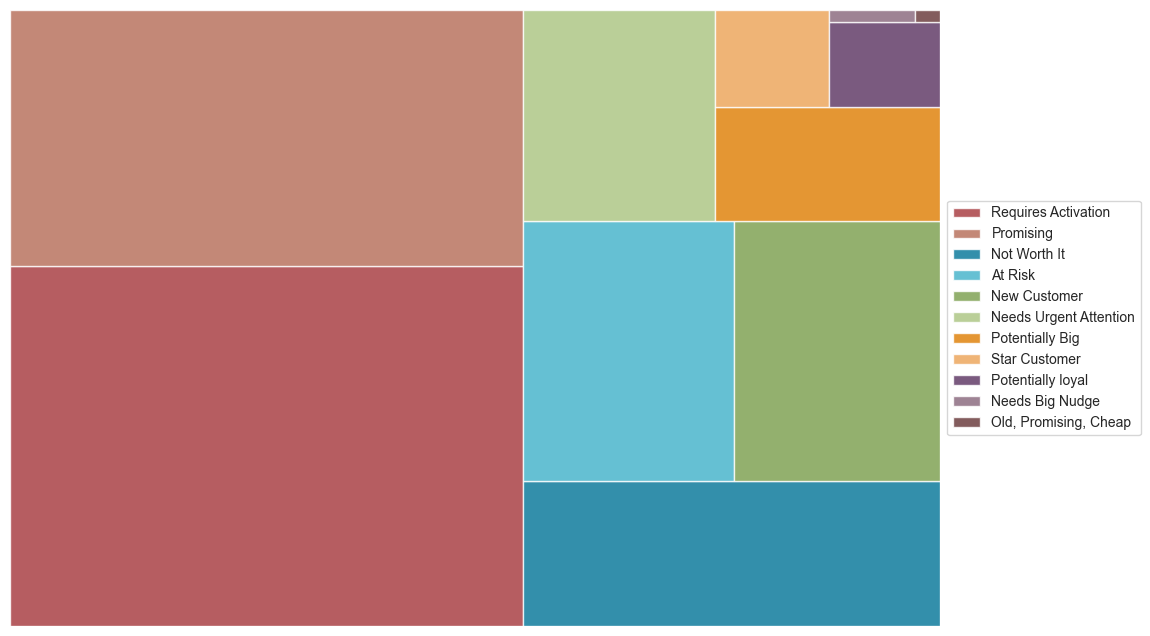

In [23]:
rfm_values = rfm['RFM_Label'].value_counts()\
                 .to_frame('Count').rename_axis('Label')\
                 .reset_index()
import squarify
colors=["#A4343A","#B46A55","#007396","#3EB1C8","#789D4A","#A9C47F","#DE7C00","#ECA154","#59315F","#86647A","#643335"]
sns.set_style(style="whitegrid") # set seaborn plot style
fig = plt.figure(constrained_layout=True, figsize=(15,8))
sizes= rfm_values["Count"]
label=rfm_values["Label"].values.tolist()
ax = squarify.plot(sizes,alpha=.8,color=colors)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.get_xaxis().set_visible(False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=ax.containers[0],labels=label)
plt.axis('off')
plt.show()

## Model Testing
Create Dummy Data and run it by the model

In [24]:
import random
recency_list = random.sample(range(df["recency"].min(),df["recency"].max()),5)
frequency_list = random.sample(range(0,100),5)
monetary_list = random.sample(range(int(df["overall monetary"].min()),2000),5)
df_test = pd.DataFrame({'recency':recency_list,'frequency':frequency_list,'monetary':monetary_list})
df_test

,recency,frequency,monetary
0,915,31,735
1,1940,64,597
2,618,32,802
3,2238,59,185
4,2324,38,215


In [25]:
def RFM(df):
    df['M'] = np.searchsorted(m_bins, df['monetary'].values)
    df['F'] = np.searchsorted(m_bins, df['frequency'].values)
    df['R'] = np.searchsorted(m_bins, df['recency'].values)
    rfm = df
    rfm['RFM_Label'] = rfm.apply(rfm_labels, axis=1)
    return rfm['RFM_Label']


Predicted Values

In [26]:
RFM(df_test)

0    Needs Urgent Attention
1    Needs Urgent Attention
2    Needs Urgent Attention
3       Requires Activation
4       Requires Activation
Name: RFM_Label, dtype: object

(2.0, 14416243.8)

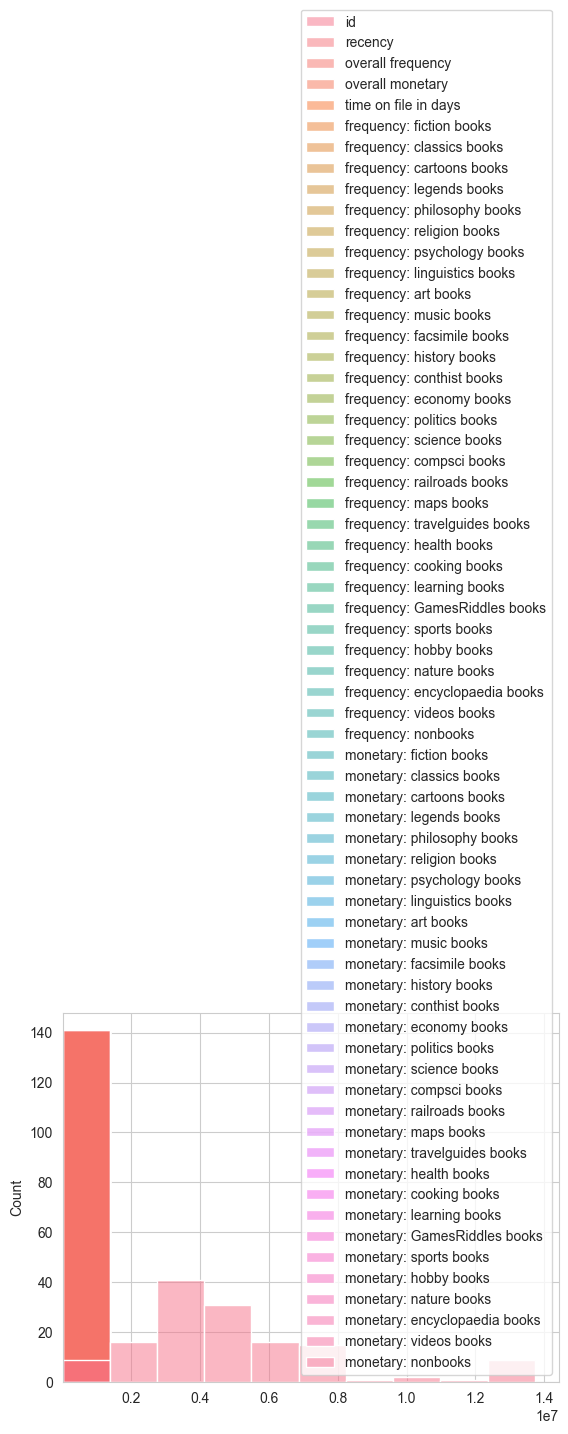

In [40]:
sns.histplot(df[df["frequency: fiction books"]>10],bins=10).set_xlim(left=2)